In [1]:
import math
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder 
from sklearn.metrics import silhouette_samples, silhouette_score
from collections import Counter
from scipy import stats
%matplotlib inline

df_test = pd.read_csv("https://raw.githubusercontent.com/marioproia/Progetto_DM1/master/Test_HR_Employee_Attrition.csv?token=ANVE7JLUER3W3JV3UGB3EMC7V23RA")
df_train = pd.read_csv("https://raw.githubusercontent.com/marioproia/Progetto_DM1/master/Train_HR_Employee_Attrition.csv?token=ANVE7JJR2LXUAEARHY3CNH27V23SQ")

frame = [df_test, df_train]
df3 = pd.concat(frame)
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,27.0,Yes,Travel_Frequently,763,Sales,15,2,Medical,1,Male,...,4,80.0,2,7,1.0,2,2.0,2,2,2
1,30.0,Yes,Travel_Rarely,1079,Sales,16,4,Marketing,1,Male,...,1,NaN,3,10,2.0,3,8.0,0,0,0
2,56.0,No,Non-Travel,150,Research & Development,2,4,Technical Degree,4,Male,...,3,80.0,1,12,2.0,2,13.0,3,1,4
3,41.0,Yes,NaN,359,Human Resources,18,5,Human Resources,4,Male,...,3,80.0,0,2,4.0,3,3.0,0,0,0
4,42.0,No,NaN,642,Research & Development,1,3,Life Sciences,4,Male,...,1,NaN,1,12,6.0,3,5.0,3,1,0


# DATA UNDERSTANDING

In [2]:
new_df = df3[['Age', 'Attrition', 'BusinessTravel',  'Department', 'DistanceFromHome', 'Education', 'EducationField','HourlyRate',
       'EnvironmentSatisfaction','Gender',  'JobLevel',  'JobSatisfaction', 'OverTime', 'PercentSalaryHike', 'WorkLifeBalance',
        "MonthlyIncome", "TrainingTimesLastYear", "NumCompaniesWorked", "MaritalStatus", "PerformanceRating", 
        'TotalWorkingYears', 'YearsAtCompany',"YearsSinceLastPromotion", "YearsInCurrentRole", "YearsWithCurrManager"]]

In [3]:
#Riempio i valori mancanti
valori = {"Age": new_df["Age"].mean(),
          "Gender": "Male", 
          "BusinessTravel": "Travel_Rarely", 
          "YearsAtCompany": new_df["YearsAtCompany"].median(),
          "TrainingTimesLastYear": new_df["TrainingTimesLastYear"].median(),
          "PerformanceRating": new_df["PerformanceRating"].median()}

new_df = new_df.fillna(value=valori)

#Separo new_df in due dataset, uno filtrato per Male e uno per Female 
male_df = new_df[new_df["Gender"] == "Male"]
female_df = new_df[new_df["Gender"] == "Female"]

#Sostituisco i valori vuoti di MonthlyIncome con la mediana per Male
male_income = {"MonthlyIncome": 4865.5}
male_df = male_df.fillna(value=male_income)

#Sostituisco i valori vuoti di MonthlyIncome con la mediana per Female
female_income = {"MonthlyIncome": 5197.0}
female_df = female_df.fillna(value=female_income)

#Riunisco i dataset che avevo separato, con tutti i missing values riempiti
frame = [male_df, female_df]
new_df = pd.concat(frame)

#df contiene il dataset con i missing values riempiti
df = new_df
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,...,MonthlyIncome,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsInCurrentRole,YearsWithCurrManager
0,27.0,Yes,Travel_Frequently,Sales,15,2,Medical,59,1,Male,...,4298.0,1.0,6,Divorced,3.0,7,2.0,2,2,2
1,30.0,Yes,Travel_Rarely,Sales,16,4,Marketing,70,1,Male,...,5304.0,2.0,2,Married,4.0,10,8.0,0,0,0
2,56.0,No,Non-Travel,Research & Development,2,4,Technical Degree,60,4,Male,...,6306.0,2.0,2,Divorced,4.0,12,13.0,1,3,4
3,41.0,Yes,Travel_Rarely,Human Resources,18,5,Human Resources,89,4,Male,...,6430.0,4.0,0,Married,3.0,2,3.0,0,0,0
4,42.0,No,Travel_Rarely,Research & Development,1,3,Life Sciences,76,4,Male,...,2766.0,6.0,3,Married,4.0,12,5.0,1,3,0


In [4]:
filtro = df[["YearsAtCompany", "TotalWorkingYears"]]
filtro[filtro["TotalWorkingYears"] < filtro["YearsAtCompany"]]

,YearsAtCompany,TotalWorkingYears
2,13.0,12
3,3.0,2
5,20.0,10
17,16.0,6
23,8.0,6
...,...,...
1132,16.0,5
1168,14.0,6
1170,10.0,1
1171,17.0,1


# CORREZIONE ERRORI

In [5]:
filtro = df[["YearsAtCompany", "TotalWorkingYears"]]

nuova = []
YearsAtCompany = filtro["YearsAtCompany"].to_list()
TotalWorkingYears = filtro["TotalWorkingYears"].to_list()

for i in range(len(YearsAtCompany)):
    if YearsAtCompany[i] > TotalWorkingYears[i]:
        nuova.append(TotalWorkingYears[i])
    else:
        nuova.append(YearsAtCompany[i])
        
df["YearsAtCompany"] = nuova
df = df[df["TotalWorkingYears"] != 0]
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,...,MonthlyIncome,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsInCurrentRole,YearsWithCurrManager
0,27.0,Yes,Travel_Frequently,Sales,15,2,Medical,59,1,Male,...,4298.0,1.0,6,Divorced,3.0,7,2.0,2,2,2
1,30.0,Yes,Travel_Rarely,Sales,16,4,Marketing,70,1,Male,...,5304.0,2.0,2,Married,4.0,10,8.0,0,0,0
2,56.0,No,Non-Travel,Research & Development,2,4,Technical Degree,60,4,Male,...,6306.0,2.0,2,Divorced,4.0,12,12.0,1,3,4
3,41.0,Yes,Travel_Rarely,Human Resources,18,5,Human Resources,89,4,Male,...,6430.0,4.0,0,Married,3.0,2,2.0,0,0,0
4,42.0,No,Travel_Rarely,Research & Development,1,3,Life Sciences,76,4,Male,...,2766.0,6.0,3,Married,4.0,12,5.0,1,3,0


In [6]:
df.to_csv(r'C:\Users\Mario\Desktop\UniPi\1° semestre\Data Mining 1\Datasets\DatasetProject1\df.csv', index = False)

# OUTLIER DETECTION

In [7]:
#Metodo con IQR
TotalWorkingYears_Q1 = df.TotalWorkingYears.quantile(0.25)
TotalWorkingYears_Q3 = df.TotalWorkingYears.quantile(0.75)
TotalWorkingYears_IQR = TotalWorkingYears_Q3 - TotalWorkingYears_Q1
lower = TotalWorkingYears_Q1 - 1.5*TotalWorkingYears_IQR
upper = TotalWorkingYears_Q3 + 1.5*TotalWorkingYears_IQR
print("IQR: ", df[ (df["TotalWorkingYears"]<lower) | (df["TotalWorkingYears"]>upper) ].shape)

#Metodo con ZSCORE
df["TWYears_zscore"] = (df.TotalWorkingYears - df.TotalWorkingYears.mean())/df.TotalWorkingYears.std()
print("ZSCORE: ", df[ (df["TWYears_zscore"]<-3) | (df["TWYears_zscore"]>3) ].shape)

#Metodo con STD
TotalWorkingYears_UL = df.TotalWorkingYears.mean() + 3*df.TotalWorkingYears.std()
TotalWorkingYears_LL = df.TotalWorkingYears.mean() - 3*df.TotalWorkingYears.std()
print("STD: ",df[df.TotalWorkingYears > TotalWorkingYears_UL].shape)

IQR:  (63, 25)
ZSCORE:  (16, 26)
STD:  (16, 26)


<ipython-input-7-db6299eda809>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TWYears_zscore"] = (df.TotalWorkingYears - df.TotalWorkingYears.mean())/df.TotalWorkingYears.std()


In [8]:
#Metodo con IQR
YearsAtCompany_Q1 = df.YearsAtCompany.quantile(0.25)
YearsAtCompany_Q3 = df.YearsAtCompany.quantile(0.75)
YearsAtCompany_IQR = YearsAtCompany_Q3 - YearsAtCompany_Q1
lower = YearsAtCompany_Q1 - 1.5*YearsAtCompany_IQR
upper = YearsAtCompany_Q3 + 1.5*YearsAtCompany_IQR
print("IQR: ", df[ (df["YearsAtCompany"]<lower) | (df["YearsAtCompany"]>upper) ].shape)

#Metodo con ZSCORE
df["YearsAtCompany_zscore"] = (df.YearsAtCompany - df.YearsAtCompany.mean())/df.YearsAtCompany.std()
print("ZSCORE: ", df[ (df["YearsAtCompany_zscore"]<-3) | (df["YearsAtCompany_zscore"]>3) ].shape)

#Metodo con STD
YearsAtCompany_UL = df.YearsAtCompany.mean() + 3*df.YearsAtCompany.std()
YearsAtCompany_LL = df.YearsAtCompany.mean() - 3*df.YearsAtCompany.std()
print("STD: ", df[df.YearsAtCompany > YearsAtCompany_UL].shape)

IQR:  (41, 26)
ZSCORE:  (29, 27)
STD:  (29, 27)


<ipython-input-8-4695cbb9d540>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["YearsAtCompany_zscore"] = (df.YearsAtCompany - df.YearsAtCompany.mean())/df.YearsAtCompany.std()


In [9]:
#Metodo con IQR
YearsInCurrentRole_Q1 = df.YearsInCurrentRole.quantile(0.25)
YearsInCurrentRole_Q3 = df.YearsInCurrentRole.quantile(0.75)
YearsInCurrentRole_IQR = YearsInCurrentRole_Q3 - YearsInCurrentRole_Q1
lower = YearsInCurrentRole_Q1 - 1.5*YearsInCurrentRole_IQR
upper = YearsInCurrentRole_Q3 + 1.5*YearsInCurrentRole_IQR
print("IQR: ", df[ (df["YearsInCurrentRole"]<lower) | (df["YearsInCurrentRole"]>upper) ].shape)

#Metodo con ZSCORE
df["YearsInCurrentRole_zscore"] = (df.YearsInCurrentRole - df.YearsInCurrentRole.mean())/df.YearsInCurrentRole.std()
print("ZSCORE: ", df[ (df["YearsInCurrentRole_zscore"]<-3) | (df["YearsInCurrentRole_zscore"]>3) ].shape)

#Metodo con STD
YearsInCurrentRole_UL = df.YearsInCurrentRole.mean() + 3*df.YearsInCurrentRole.std()
YearsInCurrentRole_LL = df.YearsInCurrentRole.mean() - 3*df.YearsInCurrentRole.std()
print("STD: ", df[df.YearsInCurrentRole > YearsInCurrentRole_UL].shape)

IQR:  (21, 27)
ZSCORE:  (13, 28)
STD:  (13, 28)


<ipython-input-9-1a6fabe7a97b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["YearsInCurrentRole_zscore"] = (df.YearsInCurrentRole - df.YearsInCurrentRole.mean())/df.YearsInCurrentRole.std()


In [10]:
#Metodo con IQR
YearsWithCurrManager_Q1 = df.YearsWithCurrManager.quantile(0.25)
YearsWithCurrManager_Q3 = df.YearsWithCurrManager.quantile(0.75)
YearsWithCurrManager_IQR = YearsWithCurrManager_Q3 - YearsWithCurrManager_Q1
lower = YearsWithCurrManager_Q1 - 1.5*YearsWithCurrManager_IQR
upper = YearsWithCurrManager_Q3 + 1.5*YearsWithCurrManager_IQR
print("IQR: ", df[ (df["YearsWithCurrManager"]<lower) | (df["YearsWithCurrManager"]>upper) ].shape)

#Metodo con ZSCORE
df["YearsWithCurrManager_zscore"] = (df.YearsWithCurrManager - df.YearsWithCurrManager.mean())/df.YearsWithCurrManager.std()
print("ZSCORE: ", df[ (df["YearsWithCurrManager_zscore"]<-3) | (df["YearsWithCurrManager_zscore"]>3) ].shape)

#Metodo con STD
YearsWithCurrManager_UL = df.YearsWithCurrManager.mean() + 3*df.YearsWithCurrManager.std()
YearsWithCurrManager_LL = df.YearsWithCurrManager.mean() - 3*df.YearsWithCurrManager.std()
print("STD: ", df[df.YearsWithCurrManager > YearsWithCurrManager_UL].shape)

IQR:  (14, 28)
ZSCORE:  (14, 29)
STD:  (14, 29)


<ipython-input-10-c54963cb0cc4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["YearsWithCurrManager_zscore"] = (df.YearsWithCurrManager - df.YearsWithCurrManager.mean())/df.YearsWithCurrManager.std()


In [11]:
#Metodo con IQR
YearsSinceLastPromotion_Q1 = df.YearsSinceLastPromotion.quantile(0.25)
YearsSinceLastPromotion_Q3 = df.YearsSinceLastPromotion.quantile(0.75)
YearsSinceLastPromotion_IQR = YearsSinceLastPromotion_Q3 - YearsSinceLastPromotion_Q1
lower = YearsSinceLastPromotion_Q1 - 1.5*YearsSinceLastPromotion_IQR
upper = YearsSinceLastPromotion_Q3 + 1.5*YearsSinceLastPromotion_IQR
print("IQR: ", df[ (df["YearsSinceLastPromotion"]<lower) | (df["YearsSinceLastPromotion"]>upper) ].shape)

#Metodo con ZSCORE
df["YearsSinceLastPromotion_zscore"] = (df.YearsSinceLastPromotion - df.YearsSinceLastPromotion.mean())/df.YearsSinceLastPromotion.std()
print("ZSCORE: ", df[ (df["YearsSinceLastPromotion_zscore"]<-3) | (df["YearsSinceLastPromotion_zscore"]>3) ].shape)

#Metodo con STD
YearsSinceLastPromotion_UL = df.YearsSinceLastPromotion.mean() + 3*df.YearsSinceLastPromotion.std()
YearsSinceLastPromotion_LL = df.YearsSinceLastPromotion.mean() - 3*df.YearsSinceLastPromotion.std()
print("STD: ", df[df.YearsSinceLastPromotion > YearsSinceLastPromotion_UL].shape)

IQR:  (107, 29)
ZSCORE:  (42, 30)
STD:  (42, 30)


<ipython-input-11-86bc6adc06b9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["YearsSinceLastPromotion_zscore"] = (df.YearsSinceLastPromotion - df.YearsSinceLastPromotion.mean())/df.YearsSinceLastPromotion.std()


In [12]:
print("Totale outliers")
print("IQR: ", sum([63,94,21,14,107]))
print("ZSCORE: ", sum([16,24,13,14,42]))
print("STD: ", sum([16,24,13,14,42]))

Totale outliers
IQR:  299
ZSCORE:  109
STD:  109


# LOG-TRANSFORMATION

In [13]:
log_df = df[["TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole", "YearsWithCurrManager", "YearsSinceLastPromotion"]]
log_df = np.log1p(log_df)
log_df.head()

,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,YearsSinceLastPromotion
0,2.079442,1.098612,1.098612,1.098612,1.098612
1,2.397895,2.197225,0.000000,0.000000,0.000000
2,2.564949,2.564949,1.386294,1.609438,0.693147
3,1.098612,1.098612,0.000000,0.000000,0.000000
4,2.564949,1.791759,1.386294,0.000000,0.693147


In [14]:
#Metodo con IQR
TotalWorkingYears_Q1 = log_df.TotalWorkingYears.quantile(0.25)
TotalWorkingYears_Q3 = log_df.TotalWorkingYears.quantile(0.75)
TotalWorkingYears_IQR = TotalWorkingYears_Q3 - TotalWorkingYears_Q1
lower = TotalWorkingYears_Q1 - 1.5*TotalWorkingYears_IQR
upper = TotalWorkingYears_Q3 + 1.5*TotalWorkingYears_IQR
print("IQR: ", log_df[ (log_df["TotalWorkingYears"]<lower) | (log_df["TotalWorkingYears"]>upper) ].shape)

#Metodo con ZSCORE
log_df["TWYears_zscore"] = (log_df.TotalWorkingYears - log_df.TotalWorkingYears.mean())/log_df.TotalWorkingYears.std()
print("ZSCORE: ", log_df[ (log_df["TWYears_zscore"]<-3) | (log_df["TWYears_zscore"]>3) ].shape)

#Metodo con STD
TotalWorkingYears_UL = log_df.TotalWorkingYears.mean() + 3*log_df.TotalWorkingYears.std()
TotalWorkingYears_LL = log_df.TotalWorkingYears.mean() - 3*log_df.TotalWorkingYears.std()
print("STD: ",log_df[log_df.TotalWorkingYears > TotalWorkingYears_UL].shape)

IQR:  (81, 5)
ZSCORE:  (0, 6)
STD:  (0, 6)


In [15]:
#Metodo con IQR
YearsAtCompany_Q1 = log_df.YearsAtCompany.quantile(0.25)
YearsAtCompany_Q3 = log_df.YearsAtCompany.quantile(0.75)
YearsAtCompany_IQR = YearsAtCompany_Q3 - YearsAtCompany_Q1
lower = YearsAtCompany_Q1 - 1.5*YearsAtCompany_IQR
upper = YearsAtCompany_Q3 + 1.5*YearsAtCompany_IQR
print("IQR: ", log_df[ (log_df["YearsAtCompany"]<lower) | (log_df["YearsAtCompany"]>upper) ].shape)

#Metodo con ZSCORE
log_df["YearsAtCompany_zscore"] = (log_df.YearsAtCompany - log_df.YearsAtCompany.mean())/log_df.YearsAtCompany.std()
print("ZSCORE: ", log_df[ (log_df["YearsAtCompany_zscore"]<-3) | (log_df["YearsAtCompany_zscore"]>3) ].shape)

#Metodo con STD
YearsAtCompany_UL = log_df.YearsAtCompany.mean() + 3*log_df.YearsAtCompany.std()
YearsAtCompany_LL = log_df.YearsAtCompany.mean() - 3*log_df.YearsAtCompany.std()
print("STD: ", log_df[log_df.YearsAtCompany > YearsAtCompany_UL].shape)

IQR:  (0, 6)
ZSCORE:  (0, 7)
STD:  (0, 7)


In [16]:
#Metodo con IQR
YearsInCurrentRole_Q1 = log_df.YearsInCurrentRole.quantile(0.25)
YearsInCurrentRole_Q3 = log_df.YearsInCurrentRole.quantile(0.75)
YearsInCurrentRole_IQR = YearsInCurrentRole_Q3 - YearsInCurrentRole_Q1
lower = YearsInCurrentRole_Q1 - 1.5*YearsInCurrentRole_IQR
upper = YearsInCurrentRole_Q3 + 1.5*YearsInCurrentRole_IQR
print("IQR: ", log_df[ (log_df["YearsInCurrentRole"]<lower) | (log_df["YearsInCurrentRole"]>upper) ].shape)

#Metodo con ZSCORE
log_df["YearsInCurrentRole_zscore"] = (log_df.YearsInCurrentRole - log_df.YearsInCurrentRole.mean())/log_df.YearsInCurrentRole.std()
print("ZSCORE: ", log_df[ (log_df["YearsInCurrentRole_zscore"]<-3) | (log_df["YearsInCurrentRole_zscore"]>3) ].shape)

#Metodo con STD
YearsInCurrentRole_UL = log_df.YearsInCurrentRole.mean() + 3*log_df.YearsInCurrentRole.std()
YearsInCurrentRole_LL = log_df.YearsInCurrentRole.mean() - 3*log_df.YearsInCurrentRole.std()
print("STD: ", log_df[log_df.YearsInCurrentRole > YearsInCurrentRole_UL].shape)

IQR:  (0, 7)
ZSCORE:  (0, 8)
STD:  (0, 8)


In [17]:
#Metodo con IQR
YearsWithCurrManager_Q1 = log_df.YearsWithCurrManager.quantile(0.25)
YearsWithCurrManager_Q3 = log_df.YearsWithCurrManager.quantile(0.75)
YearsWithCurrManager_IQR = YearsWithCurrManager_Q3 - YearsWithCurrManager_Q1
lower = YearsWithCurrManager_Q1 - 1.5*YearsWithCurrManager_IQR
upper = YearsWithCurrManager_Q3 + 1.5*YearsWithCurrManager_IQR
print("IQR: ", log_df[ (log_df["YearsWithCurrManager"]<lower) | (log_df["YearsWithCurrManager"]>upper) ].shape)

#Metodo con ZSCORE
log_df["YearsWithCurrManager_zscore"] = (log_df.YearsWithCurrManager - log_df.YearsWithCurrManager.mean())/log_df.YearsWithCurrManager.std()
print("ZSCORE: ", log_df[ (log_df["YearsWithCurrManager_zscore"]<-3) | (log_df["YearsWithCurrManager_zscore"]>3) ].shape)

#Metodo con STD
YearsWithCurrManager_UL = log_df.YearsWithCurrManager.mean() + 3*log_df.YearsWithCurrManager.std()
YearsWithCurrManager_LL = log_df.YearsWithCurrManager.mean() - 3*log_df.YearsWithCurrManager.std()
print("STD: ", log_df[log_df.YearsWithCurrManager > YearsWithCurrManager_UL].shape)

IQR:  (0, 8)
ZSCORE:  (0, 9)
STD:  (0, 9)


In [18]:
#Metodo con IQR
YearsSinceLastPromotion_Q1 = log_df.YearsSinceLastPromotion.quantile(0.25)
YearsSinceLastPromotion_Q3 = log_df.YearsSinceLastPromotion.quantile(0.75)
YearsSinceLastPromotion_IQR = YearsSinceLastPromotion_Q3 - YearsSinceLastPromotion_Q1
lower = YearsSinceLastPromotion_Q1 - 1.5*YearsSinceLastPromotion_IQR
upper = YearsSinceLastPromotion_Q3 + 1.5*YearsSinceLastPromotion_IQR
print("IQR: ", log_df[ (log_df["YearsSinceLastPromotion"]<lower) | (log_df["YearsSinceLastPromotion"]>upper) ].shape)

#Metodo con ZSCORE
log_df["YearsSinceLastPromotion_zscore"] = (log_df.YearsSinceLastPromotion - log_df.YearsSinceLastPromotion.mean())/log_df.YearsSinceLastPromotion.std()
print("ZSCORE: ", log_df[ (log_df["YearsSinceLastPromotion_zscore"]<-3) | (log_df["YearsSinceLastPromotion_zscore"]>3) ].shape)

#Metodo con STD
YearsSinceLastPromotion_UL = log_df.YearsSinceLastPromotion.mean() + 3*log_df.YearsSinceLastPromotion.std()
YearsSinceLastPromotion_LL = log_df.YearsSinceLastPromotion.mean() - 3*log_df.YearsSinceLastPromotion.std()
print("STD: ", log_df[log_df.YearsSinceLastPromotion > YearsSinceLastPromotion_UL].shape)

IQR:  (0, 9)
ZSCORE:  (0, 10)
STD:  (0, 10)


In [19]:
print("Totale outliers dopo una log-transormation")
print("IQR: ", sum([92,42,0,0,0]))
print("ZSCORE: ", sum([11,0,0,0,0]))
print("STD: ", sum([0,0,0,0,0]))

Totale outliers dopo una log-transormation
IQR:  134
ZSCORE:  11
STD:  0


# ONE-HOT ENCODER

In [20]:
le = LabelEncoder()

dfle = df
dfle["Gender"] = le.fit_transform(dfle.Gender)
dfle["MaritalStatus"] = le.fit_transform(dfle.MaritalStatus)
dfle["BusinessTravel"] = le.fit_transform(dfle.BusinessTravel)

dfle.head()

<ipython-input-20-012a0eb8e53d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfle["Gender"] = le.fit_transform(dfle.Gender)
<ipython-input-20-012a0eb8e53d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfle["MaritalStatus"] = le.fit_transform(dfle.MaritalStatus)
<ipython-input-20-012a0eb8e53d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsInCurrentRole,YearsWithCurrManager,TWYears_zscore,YearsAtCompany_zscore,YearsInCurrentRole_zscore,YearsWithCurrManager_zscore,YearsSinceLastPromotion_zscore
0,27.0,Yes,1,Sales,15,2,Medical,59,1,1,...,7,2.0,2,2,2,-0.563330,-0.800946,-0.624962,-0.604525,-0.063256
1,30.0,Yes,2,Sales,16,4,Marketing,70,1,1,...,10,8.0,0,0,0,-0.176129,0.739024,-1.177748,-1.165773,-0.682655
2,56.0,No,0,Research & Development,2,4,Technical Degree,60,4,1,...,12,12.0,1,3,4,0.082005,1.765670,-0.348570,-0.043277,-0.372956
3,41.0,Yes,2,Human Resources,18,5,Human Resources,89,4,1,...,2,2.0,0,0,0,-1.208665,-0.800946,-1.177748,-1.165773,-0.682655
4,42.0,No,2,Research & Development,1,3,Life Sciences,76,4,1,...,12,5.0,1,3,0,0.082005,-0.030961,-0.348570,-1.165773,-0.372956


In [21]:
#transform numerical in categorical (BINNING)
bins=[0, 10, 20, 30]

#names for the groups
group_names = ["Near", "Far", "Very far"]

df["DistanceFromHome"] = pd.cut(df["DistanceFromHome"], bins, labels=group_names)
df.head()

<ipython-input-21-5be67f6d6dc4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DistanceFromHome"] = pd.cut(df["DistanceFromHome"], bins, labels=group_names)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsInCurrentRole,YearsWithCurrManager,TWYears_zscore,YearsAtCompany_zscore,YearsInCurrentRole_zscore,YearsWithCurrManager_zscore,YearsSinceLastPromotion_zscore
0,27.0,Yes,1,Sales,Far,2,Medical,59,1,1,...,7,2.0,2,2,2,-0.563330,-0.800946,-0.624962,-0.604525,-0.063256
1,30.0,Yes,2,Sales,Far,4,Marketing,70,1,1,...,10,8.0,0,0,0,-0.176129,0.739024,-1.177748,-1.165773,-0.682655
2,56.0,No,0,Research & Development,Near,4,Technical Degree,60,4,1,...,12,12.0,1,3,4,0.082005,1.765670,-0.348570,-0.043277,-0.372956
3,41.0,Yes,2,Human Resources,Far,5,Human Resources,89,4,1,...,2,2.0,0,0,0,-1.208665,-0.800946,-1.177748,-1.165773,-0.682655
4,42.0,No,2,Research & Development,Near,3,Life Sciences,76,4,1,...,12,5.0,1,3,0,0.082005,-0.030961,-0.348570,-1.165773,-0.372956


# KMEANS CLUSTERING

In [22]:
clustering = df[["Age", "MonthlyIncome", "HourlyRate"]]
clustering.head()

,Age,MonthlyIncome,HourlyRate
0,27.0,4298.0,59
1,30.0,5304.0,70
2,56.0,6306.0,60
3,41.0,6430.0,89
4,42.0,2766.0,76


In [23]:
scaler = RobustScaler()

X = scaler.fit_transform(clustering.values)

In [24]:
scaler.transform(clustering.values)

array([[-0.9195693 , -0.17168356, -0.19444444],
       [-0.64684203,  0.13265769,  0.11111111],
       [ 1.71679433,  0.43578884, -0.16666667],
       ...,
       [ 0.0804307 ,  0.14445621,  0.66666667],
       [-0.01047839, -0.83209802,  0.83333333],
       [-0.37411476,  0.0851611 ,  0.27777778]])

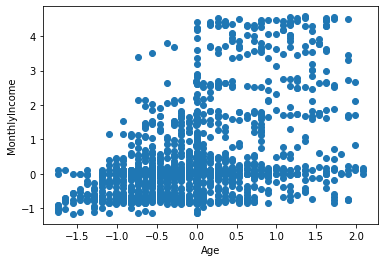

In [25]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel("Age")
plt.ylabel("MonthlyIncome")
plt.show()

In [26]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100, random_state=0)
kmeans.fit(X)

KMeans(max_iter=100, n_clusters=3, random_state=0)

In [27]:
y_predicted = kmeans.fit_predict(X[:,[0, 1, 2]])
y_predicted


array([0, 0, 2, ..., 0, 0, 0])

In [28]:
clustering['Cluster']=y_predicted
df['Cluster']=y_predicted

clustering.head()

<ipython-input-28-a38ea8b15346>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering['Cluster']=y_predicted
<ipython-input-28-a38ea8b15346>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster']=y_predicted


,Age,MonthlyIncome,HourlyRate,Cluster
0,27.0,4298.0,59,0
1,30.0,5304.0,70,0
2,56.0,6306.0,60,2
3,41.0,6430.0,89,2
4,42.0,2766.0,76,0


In [29]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([846, 167, 446], dtype=int64))

In [30]:
kmeans.cluster_centers_

array([[-0.43051017, -0.27866185,  0.01097353],
       [ 0.79449109,  3.48726628, -0.01214238],
       [ 0.52095744,  0.60117965, -0.02733984]])

In [31]:
centers = np.array(kmeans.cluster_centers_)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

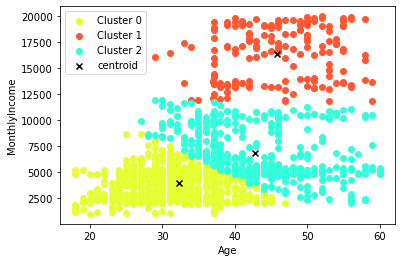

In [47]:
df0 = clustering[clustering.Cluster==0]
df1 = clustering[clustering.Cluster==1]
df2 = clustering[clustering.Cluster==2]

plt.scatter(df0.Age, df0.MonthlyIncome, color='#e6ff33', label="Cluster 0")
plt.scatter(df1.Age, df1.MonthlyIncome, color='#ff5733', label="Cluster 1")
plt.scatter(df2.Age, df2.MonthlyIncome, color='#33ffdd', label="Cluster 2")

plt.scatter(centers[:,0], centers[:,1], color='black', marker='x', label='centroid')

plt.xlabel("Age")
plt.ylabel("MonthlyIncome")

plt.legend()
plt.show()

In [33]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([846, 167, 446], dtype=int64))

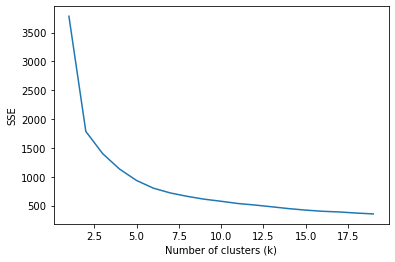

In [34]:
sse = []
k_rng = range(1,20)
for k in k_rng:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

plt.show()

In [35]:
print('SSE: ', kmeans.inertia_) #inertia tells how far away the points within a cluster are
print('Silhouette: ', silhouette_score(X, kmeans.labels_))

SSE:  355.90491526919806
Silhouette:  0.2790820359653782


In [36]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,...,YearsAtCompany,YearsSinceLastPromotion,YearsInCurrentRole,YearsWithCurrManager,TWYears_zscore,YearsAtCompany_zscore,YearsInCurrentRole_zscore,YearsWithCurrManager_zscore,YearsSinceLastPromotion_zscore,Cluster
0,27.0,Yes,1,Sales,Far,2,Medical,59,1,1,...,2.0,2,2,2,-0.563330,-0.800946,-0.624962,-0.604525,-0.063256,0
1,30.0,Yes,2,Sales,Far,4,Marketing,70,1,1,...,8.0,0,0,0,-0.176129,0.739024,-1.177748,-1.165773,-0.682655,0
2,56.0,No,0,Research & Development,Near,4,Technical Degree,60,4,1,...,12.0,1,3,4,0.082005,1.765670,-0.348570,-0.043277,-0.372956,2
3,41.0,Yes,2,Human Resources,Far,5,Human Resources,89,4,1,...,2.0,0,0,0,-1.208665,-0.800946,-1.177748,-1.165773,-0.682655,2
4,42.0,No,2,Research & Development,Near,3,Life Sciences,76,4,1,...,5.0,1,3,0,0.082005,-0.030961,-0.348570,-1.165773,-0.372956,0


In [37]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]

In [38]:
round((df0["Attrition"].value_counts()/len(df0))*100, 2)

No     84.87
Yes    15.13
Name: Attrition, dtype: float64

In [39]:
round((df1["Attrition"].value_counts()/len(df1))*100, 2)

No     86.83
Yes    13.17
Name: Attrition, dtype: float64

In [40]:
round((df2["Attrition"].value_counts()/len(df2))*100, 2)

No     81.61
Yes    18.39
Name: Attrition, dtype: float64

In [41]:
round((df0["Department"].value_counts()/len(df0))*100, 2)

Research & Development    64.07
Sales                     32.27
Human Resources            3.66
Name: Department, dtype: float64

In [42]:
round((df1["Department"].value_counts()/len(df1))*100, 2)

Research & Development    71.86
Sales                     23.35
Human Resources            4.79
Name: Department, dtype: float64

In [43]:
round((df2["Department"].value_counts()/len(df2))*100, 2)

Research & Development    65.47
Sales                     29.15
Human Resources            5.38
Name: Department, dtype: float64

In [44]:
round((df0["MaritalStatus"].value_counts()/len(df0))*100, 2)

1    47.04
2    29.91
0    23.05
Name: MaritalStatus, dtype: float64

In [45]:
round((df1["MaritalStatus"].value_counts()/len(df1))*100, 2)

1    49.70
2    30.54
0    19.76
Name: MaritalStatus, dtype: float64

In [46]:
round((df2["MaritalStatus"].value_counts()/len(df2))*100, 2)

1    42.83
2    34.98
0    22.20
Name: MaritalStatus, dtype: float64